## 1. K-Means vs GMM on a Generated Dataset

In the first example, we'll generate a Gaussian dataset and attempt to cluster it and see if the clustering matches the original labels of the generated dataset.

We can use sklearn's [make_blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function to create a dataset of Gaussian blobs:

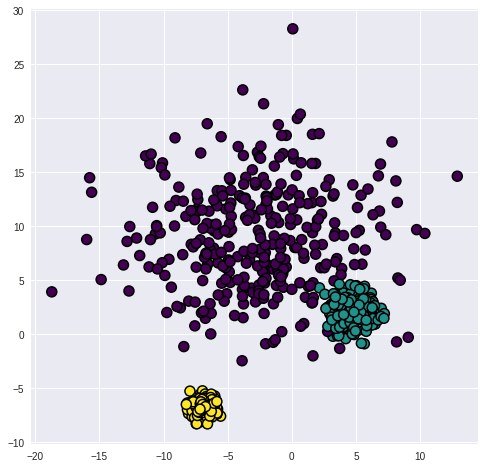

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
%matplotlib inline

n_samples = 1000

# Create dataset of Gaussian blobs
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[5,1,.5], random_state=42)

X, y = varied[0], varied[1]

# Plot
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], 
            # Color
            c=y, 
            # Border color of each dot
            edgecolor='black',
            # Line width (**kwargs)
            lw=1.5,
            # Dot size (**kwargs)
            s=100,
            cmap=plt.get_cmap('viridis'))
plt.show()

Now when we hand off this dataset to the clustering algorithms, we obviously will not pass in the labels. So let's start with KMeans and see how it does with the dataset. WIll it be to produce clusters that match the original labels?

In [0]:
from sklearn.cluster import KMeans

# Cluster this dataset with KMeans
kmeans = KMeans(n_clusters=3)
pred   = kmeans.fit_predict(X)

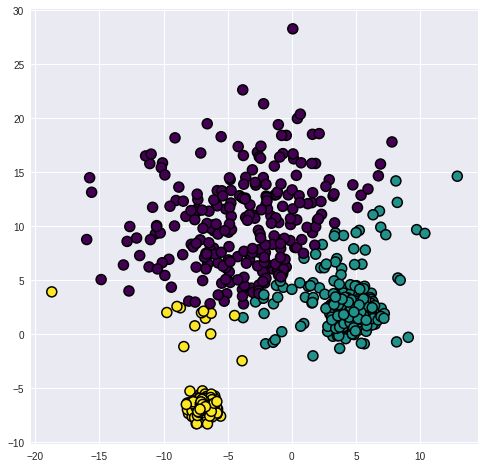

In [0]:
# Plot
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], 
            # Color
            c=pred,
            # Border color of each dot
            edgecolor='black',
            # Line width (**kwargs)
            lw=1.5,
            # Dot size (**kwargs)
            s=100,
            cmap=plt.get_cmap('viridis'))
plt.show()

How good of a job did KMeans do? Was it able to find clusters that match or are similar to the original labels?

Let us now try clustering with [GaussianMixture](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html):

In [0]:
# Import GaussianMixture
from sklearn.mixture import GaussianMixture

# Create an instance of Gaussian Mixture with 3 components
gmm = GaussianMixture(n_components=3)

# Fit the dataset
gmm = gmm.fit(X)

# Predict the clustering labels
pred_gmm = gmm.predict(X)

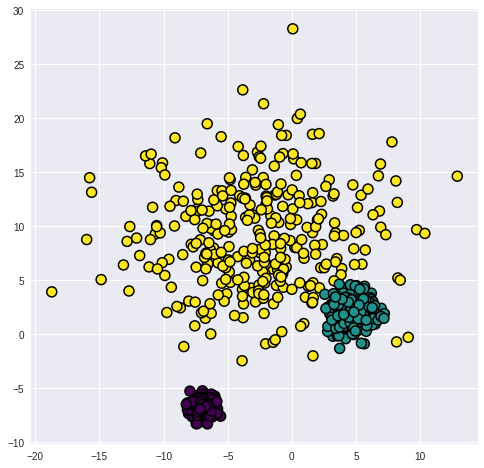

In [0]:
# Plot
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], 
            # Color
            c=pred_gmm,
            # Border color of each dot
            edgecolor='black', 
            # Line width (**kwargs)
            lw=1.5,
            # Dot size (**kwargs)
            s=100,
            cmap=plt.get_cmap('viridis'))
plt.show()

By visually comparing the result of KMeans and GMM clustering, which one was better able to match the original?

## 2. K-Means vs GMM on the Iris dataset
For our second example, we'll take a dataset that has more than two features. The iris dataset is great for purpose since it is reasonable to assume it's distributed according to Gaussian distributions.

The Iris dataset is labeled dataset with four features:

In [0]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


How do you visualize a datset with four dimensions? 

There are a few ways (e.g. [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html), [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), or [project into a lower number number dimensions using PCA](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py)). Let's attempt to visualize using PairGrid because it does not distort the dataset -- it merely plots every pair of features against each other in a subplot:

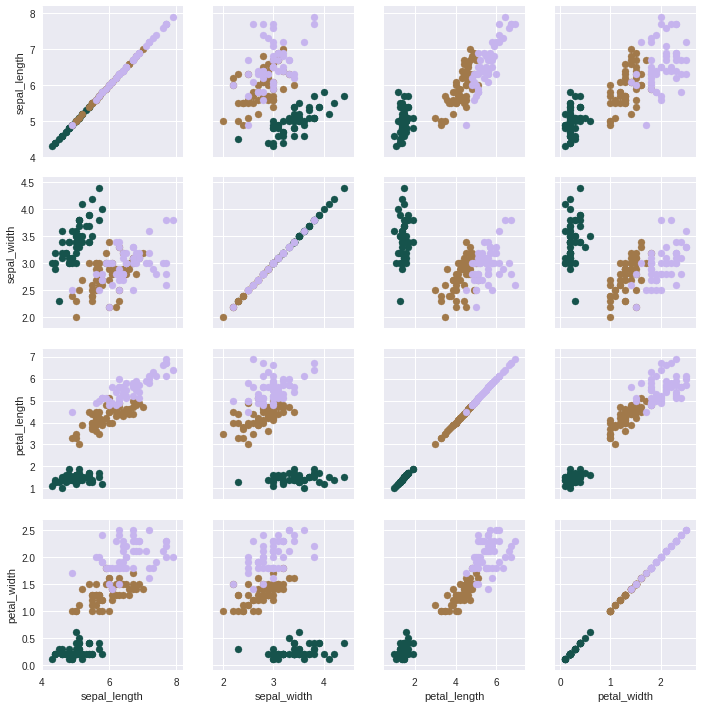

In [0]:
g = sns.PairGrid(iris, 
                 # Variable to map plot aspects to different colors
                 hue='species',
                 # Color palette
                 palette=sns.color_palette('cubehelix', 3),
                 # Variables within data
                 vars=['sepal_length','sepal_width','petal_length','petal_width']) 
g.map(plt.scatter)
plt.show()

If we cluster the Iris datset using KMeans, how close would the resulting clusters match the original labels?

In [0]:
kmeans_iris      = KMeans(n_clusters=3)
pred_kmeans_iris = kmeans_iris.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

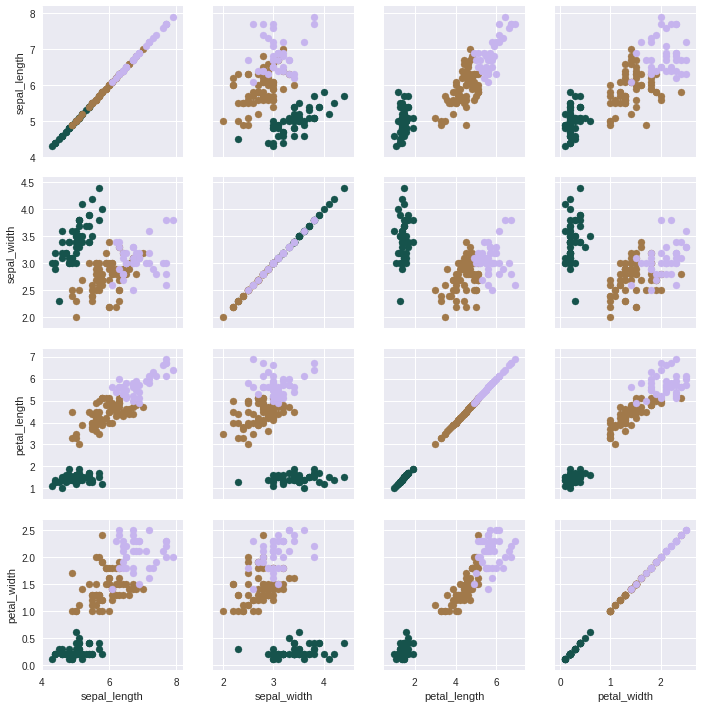

In [0]:
iris['kmeans_pred'] = pred_kmeans_iris

g = sns.PairGrid(iris,
                hue='kmeans_pred',
                palette=sns.color_palette('cubehelix', 3),
                vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

How do these clusters match the original labels?

You can clearly see that visual inspection is no longer useful if we're working with multiple dimensions like this. So how can we evaluate the clustering result versus the original labels?

We can use an external cluster validation index such as the [Adjusted Rand Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) which generates a score between -1 and 1 (where an exact match will be scored as 1).

In [0]:
# Import Adjusted Rand Score
from sklearn.metrics import adjusted_rand_score

# Calculate Adjusted Rand Score
iris_kmeans_score = adjusted_rand_score(iris['species'],iris['kmeans_pred'])

# Print the score
iris_kmeans_score

0.7302382722834697

What if we cluster using Gaussian Mixture models? Would it earn a better ARI score?

In [0]:
gmm_iris      = GaussianMixture(n_components=3).fit(iris[['sepal_length','sepal_width','petal_length','petal_width']])
pred_gmm_iris = gmm_iris.predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

In [0]:
iris['gmm_pred'] = pred_gmm_iris

# Calculate Adjusted Rand Score passing the original labels and the
# GMM predicted labels iris['species']
iris_gmm_score = adjusted_rand_score(iris['species'], pred_gmm_iris)

# Print Score
iris_gmm_score

0.9038742317748124

In [0]:
g = sns.PairGrid(iris,
                hue='kmeans_pred',
                palette=sns.color_palette('cubehelix', 3),
                vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()